In [1]:
import pandas as pd
import pymc3 as pm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


/home/stefy/anaconda3/lib/python3.8/site-packages/llvmlite/llvmpy/__init__.py:3: UserWarning: The module `llvmlite.llvmpy` is deprecated and will be removed in the future.
  warnings.warn(
/home/stefy/anaconda3/lib/python3.8/site-packages/llvmlite/llvmpy/core.py:8: UserWarning: The module `llvmlite.llvmpy.core` is deprecated and will be removed in the future. Equivalent functionality is provided by `llvmlite.ir`.
  warnings.warn(
/home/stefy/anaconda3/lib/python3.8/site-packages/llvmlite/llvmpy/passes.py:17: UserWarning: The module `llvmlite.llvmpy.passes` is deprecated and will be removed in the future. If you are using this code, it should be inlined into your own project.
  warnings.warn(


# Load Dataset

In [2]:
df = pd.read_csv('./heart-failure.csv', sep=',', index_col=False)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Function

In [3]:
def df_train(number_register):
    df_train = df.copy()
    df_train = df_train.head(number_register)
    return df_train

def df_test(number_register):
    df_test = df.copy()
    df_test = df_test.tail(number_register)
    return df_test

def min_value(column_name):
    min_value = df[column_name].min()
    print(f"El valor min {column_name} es {min_value}")
    return min_value

def max_value(column_name):
    max_value = df[column_name].max()
    print(f"El valor max {column_name} es {max_value}")
    return max_value

def data_gen_min_value(column_name):
    min_value = sintetico[column_name].min()
    print(f"El valor min {column_name} es {min_value}")
    return min_value

def data_gen_max_value(column_name):
    max_value = sintetico[column_name].max()
    print(f"El valor max {column_name} es {max_value}")
    return max_value

# Clean Data

In [4]:
# Nulos en las columnas
df_null = df.isnull().sum()
df_null

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
# rename target variable
df = df.rename(columns={'DEATH_EVENT':'target'})

In [6]:
# int 
df[['age','platelets']] = df[['age','platelets']].astype(int)

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45,0,2413,0,38,0,140000,1.4,140,1,1,280,0


# Analize data real

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.026756,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


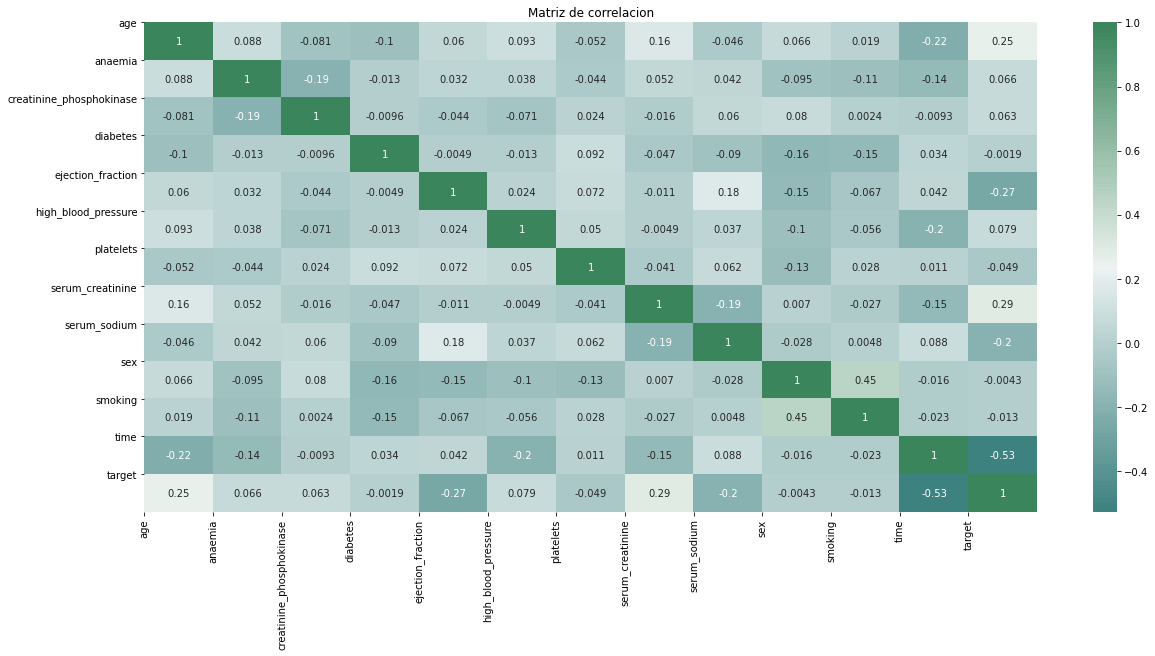

In [9]:
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure(figsize=(20, 9))
sns.heatmap(matriz_correlaciones, annot=True, cmap = sns.diverging_palette(188, 143, n=143))
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
_ = plt.title('Matriz de correlacion')
plt.show()

### Numeric columns

In [10]:
min_value_age = min_value('age')
max_value_age = max_value('age')

El valor min age es 40
El valor max age es 95


In [11]:
min_value_creatine = min_value('serum_creatinine')
max_value_creatine = max_value('serum_creatinine')

El valor min serum_creatinine es 0.5
El valor max serum_creatinine es 9.4


In [12]:
min_value_ejection = min_value('ejection_fraction')
max_value_ejection = max_value('ejection_fraction')

El valor min ejection_fraction es 14
El valor max ejection_fraction es 80


### Binary columns

In [13]:
min_value_anemia = min_value('anaemia')
max_value_anemia = max_value('anaemia')

El valor min anaemia es 0
El valor max anaemia es 1


In [14]:
min_value_diabetes = min_value('diabetes')
max_value_diabetes = max_value('diabetes')

El valor min diabetes es 0
El valor max diabetes es 1


In [15]:
min_value_pressure = min_value('high_blood_pressure')
max_value_pressure = max_value('high_blood_pressure')

El valor min high_blood_pressure es 0
El valor max high_blood_pressure es 1


In [16]:
min_value_sex = min_value('sex')
max_value_sex = max_value('sex')

El valor min sex es 0
El valor max sex es 1


In [17]:
min_value_smoking = min_value('smoking')
max_value_smoking = max_value('smoking')

El valor min smoking es 0
El valor max smoking es 1


# Split train - test data

In [18]:
df_train = df_train(275)
#print(df_train)
df_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,44,0,582,1,30,1,263358,1.6,130,1,1,244,0
271,51,0,582,1,40,0,221000,0.9,134,0,0,244,0
272,67,0,213,0,38,0,215000,1.2,133,0,0,245,0
273,42,0,64,0,40,0,189000,0.7,140,1,0,245,0


In [19]:
#df_test = df_test(25)
#df_test

# Steps to create Generative Bayesian model

## Split features (independient variable) and target (dependient variable)

In [20]:
# Split predictors variables(x) and target variable(y)

x_real = df_train.drop(['target','time',"platelets","creatinine_phosphokinase","serum_sodium"], axis=1)
y_real = df_train['target'].to_frame()

In [21]:
# verify matrix 
x_shape = x_real.shape
y_shape = y_real.shape

#y_shape

In [22]:
df = pd.concat([x_real,y_real], axis=1)
df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,target
0,75,0,0,20,1,1.9,1,0,1
1,55,0,0,38,0,1.1,1,0,1
2,65,0,0,20,0,1.3,1,1,1
3,50,1,0,20,0,1.9,1,0,1
4,65,1,1,20,0,2.7,0,0,1
...,...,...,...,...,...,...,...,...,...
270,44,0,1,30,1,1.6,1,1,0
271,51,0,1,40,0,0.9,0,0,0
272,67,0,0,38,0,1.2,0,0,0
273,42,0,0,40,0,0.7,1,0,0


## Split  binary, numeric and target  data

### Binary data

In [23]:
binary_data = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]

# array only values
binary_data_values = binary_data.values
binary_data.shape

(275, 5)

### Numeric data

In [24]:
numeric_age = df['age']

# array only values
numeric_age_values = numeric_age.values

In [25]:
numeric_age = numeric_age.to_numpy()
numeric_age = numeric_age.reshape(-1,1)
numeric_age.shape

(275, 1)

In [26]:
numeric_eyection = x_real['ejection_fraction']

# array only values
numeric_eyection_values = numeric_eyection.values

In [27]:
numeric_eyection = numeric_eyection.to_numpy()
numeric_eyection = numeric_eyection.reshape(-1,1)
numeric_eyection.shape

(275, 1)

In [28]:
numeric_creatinine = x_real['serum_creatinine']

# array only values
numeric_creatinine_values = numeric_creatinine.values

In [29]:
numeric_creatinine = numeric_creatinine.to_numpy()
numeric_creatinine = numeric_creatinine.reshape(-1,1)
numeric_creatinine.shape

(275, 1)

### Target data

In [30]:
# target variable
y_target = y_real
y_target_values = y_target.values

## Standardize

In [31]:
def standardize(series):
    return (series - series.mean()) / series.std()

In [32]:
standardize_age = standardize(numeric_age_values)
#standardize_age

In [33]:
standardize_creatinine = standardize(numeric_creatinine_values)
#standardize_creatinine

In [34]:
standardize_eyection = standardize(numeric_eyection_values)
#standardize_eyection

In [35]:
df.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,target
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,61.123636,0.450909,0.410909,37.945455,0.374545,1.404618,0.654545,0.320000,0.349091
std,11.895499,0.498491,0.492896,12.148741,0.484888,1.060055,0.476383,0.467327,0.477552
min,40.000000,0.000000,0.000000,14.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,51.500000,0.000000,0.000000,30.000000,0.000000,0.900000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,38.000000,0.000000,1.100000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,45.000000,1.000000,1.400000,1.000000,1.000000,1.000000
max,95.000000,1.000000,1.000000,80.000000,1.000000,9.400000,1.000000,1.000000,1.000000


# Generative model

In [36]:
generative_model = pm.Model()
with generative_model:
    # prior for unknow model parameters
    x_binaria = pm.Bernoulli('x_binaria',p=0.5, shape= binary_data.shape)
    
    x_edad = pm.Normal('x_edad', mu=numeric_age.mean(), sd=12, shape=numeric_age.shape, observed=numeric_age)
    
    #x_creatinine = pm.Normal('x_creatinine', mu=numeric_creatinine.mean(), sd=2, shape=numeric_creatinine.shape, observed=numeric_creatinine)
    x_creatinine = pm.TruncatedNormal('x_creatinine', mu=numeric_creatinine.mean(), sigma=2, lower=0.5, upper=10, shape=numeric_creatinine.shape, observed=numeric_creatinine)

    x_ejection = pm.HalfNormal('x_ejection', sd=20, shape=numeric_eyection.shape, observed=numeric_eyection)

    
    math_binary = binary_data_values * x_binaria
    math_age = standardize_age * x_edad
    math_ejection = standardize_eyection * x_ejection
    math_creatinine = standardize_creatinine * x_creatinine
    
    p_binary = pm.invlogit(math_binary)
    p_age = pm.invlogit(math_age)
    p_ejection = pm.invlogit(math_ejection)
    p_creatinine = pm.invlogit(math_creatinine)

    p = pm.math.concatenate([p_binary, p_age,p_ejection,p_creatinine], axis=1)
    
    # likelihood
    y_target = pm.Bernoulli('y_target',p=p, observed=y_target)

In [37]:
with generative_model:
        #trace = pm.sample(1000, tune=1000)
        trace = pm.sample_posterior_predictive(
        'trace',
        samples=100,
        var_names=["x_binaria","x_edad","x_ejection","x_creatinine","y_target"])

WARNING (theano.tensor.opt): Optimization Warning: The Op scalar_sigmoid does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.


In [ ]:
# generating 

import arviz as az
with generative_model:
    trace = pm.sample(1000, tune=1000)
    prior = pm.sample_posterior_predictive(trace)
    posterior_predictive = pm.sample_posterior_predictive(trace, samples=1000)
    pm_data = az.from_pymc3(
        trace=trace,
        prior=prior,
        posterior_predictive=posterior_predictive)
        
pm_data

In [38]:
binary_generative = trace['x_binaria']
binary_generative.shape

(100, 275, 5)

In [39]:
age_generative = trace['x_edad']
age_generative

array([[[68.77334403],
        [30.85348007],
        [69.73536184],
        ...,
        [52.10911636],
        [65.74134118],
        [92.54620887]],

       [[45.24280736],
        [54.52816008],
        [61.92520762],
        ...,
        [85.90931245],
        [65.70977614],
        [76.07071289]],

       [[47.84149813],
        [60.26873343],
        [72.02309962],
        ...,
        [71.61233409],
        [68.35670154],
        [75.9563109 ]],

       ...,

       [[44.22282314],
        [53.43025339],
        [71.29310104],
        ...,
        [43.39514551],
        [58.97892011],
        [75.38749226]],

       [[75.48612793],
        [70.96571289],
        [72.76466559],
        ...,
        [52.96824514],
        [76.45763938],
        [75.4233943 ]],

       [[59.17288614],
        [56.97702915],
        [75.60002802],
        ...,
        [71.33201825],
        [72.36481991],
        [57.81355528]]])

In [40]:
ejection_generative = trace['x_ejection']
ejection_generative

array([[[ 7.00559179],
        [17.74962666],
        [ 7.88840868],
        ...,
        [19.57836446],
        [ 3.45021525],
        [19.69068146]],

       [[19.23206377],
        [11.96640767],
        [15.06593755],
        ...,
        [25.9277657 ],
        [12.18166476],
        [32.13368858]],

       [[ 0.81879295],
        [12.00653825],
        [ 4.47328667],
        ...,
        [ 8.48707464],
        [13.29105847],
        [11.90515858]],

       ...,

       [[11.62250722],
        [ 5.0173129 ],
        [36.47811853],
        ...,
        [21.66429689],
        [ 7.87121734],
        [ 0.94237824]],

       [[25.59537948],
        [11.28622154],
        [ 0.15377294],
        ...,
        [28.51038462],
        [ 5.54938075],
        [16.71031679]],

       [[23.05603592],
        [26.91155601],
        [17.59968385],
        ...,
        [26.37549833],
        [46.65773303],
        [16.51576119]]])

In [41]:
creatinine_generative = trace['x_creatinine']
creatinine_generative

array([[[1.96642394],
        [5.16378313],
        [2.09512761],
        ...,
        [2.36049956],
        [1.47122153],
        [2.25254412]],

       [[2.89786383],
        [6.83248344],
        [0.7733839 ],
        ...,
        [1.5473111 ],
        [3.53219776],
        [1.18885744]],

       [[3.50493784],
        [2.30447239],
        [4.48927034],
        ...,
        [6.1552938 ],
        [1.82957783],
        [3.82384298]],

       ...,

       [[0.96764172],
        [1.45608747],
        [1.29558515],
        ...,
        [1.78760247],
        [2.34903617],
        [4.78749989]],

       [[2.88601589],
        [2.52152485],
        [1.59006945],
        ...,
        [3.36285645],
        [3.96716993],
        [2.97583557]],

       [[2.24740151],
        [1.27824088],
        [1.46867251],
        ...,
        [3.87834014],
        [3.36182356],
        [0.607594  ]]])

In [42]:
target_generative = trace['y_target']
target_generative.shape

(100, 275, 830)

In [43]:
binary_generative = binary_generative.reshape(-1, binary_generative.shape[-1])
binary_generative = pd.DataFrame(binary_generative, columns=['anaemia','diabetes','high_blood_pressure','sex','smoking'])
type(binary_generative)

binary_generative

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,1,1,0,1
1,1,1,0,1,0
2,1,1,0,1,0
3,0,0,0,1,0
4,1,1,1,0,1
...,...,...,...,...,...
27495,0,0,1,0,0
27496,1,0,1,1,1
27497,0,1,0,0,0
27498,0,0,1,1,1


In [44]:
len(binary_generative)

27500

In [45]:
binary_generative_null = binary_generative.isnull().sum()
binary_generative_null

anaemia                0
diabetes               0
high_blood_pressure    0
sex                    0
smoking                0
dtype: int64

In [46]:
age_generative = age_generative.reshape(-1, age_generative.shape[-1])
#numeric_generative_number = numeric_generative * 100
#numeric_generative = pd.DataFrame(numeric_generative, columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])
age_generative = pd.DataFrame(age_generative, columns=['age'])

type(age_generative)
#numeric_generative = numeric_generative * 100
#numeric_generative[['age','platelets']] = numeric_generative[['age','platelets']].astype(int)
age_generative.head(27501)

,age
0,68.773344
1,30.853480
2,69.735362
3,58.694217
4,64.749158
...,...
27495,89.365940
27496,60.061589
27497,71.332018
27498,72.364820


In [47]:
len(age_generative)

27500

In [48]:
age_generative_null = age_generative.isnull().sum()
age_generative_null

age    0
dtype: int64

In [49]:
creatinine_generative = creatinine_generative.reshape(-1, creatinine_generative.shape[-1])
#numeric_generative_number = numeric_generative * 100
#numeric_generative = pd.DataFrame(numeric_generative, columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])
creatinine_generative = pd.DataFrame(creatinine_generative, columns=['serum_creatinine'])

type(creatinine_generative)
#numeric_generative = numeric_generative * 100
#numeric_generative[['age','platelets']] = numeric_generative[['age','platelets']].astype(int)
creatinine_generative.head(27501)

,serum_creatinine
0,1.966424
1,5.163783
2,2.095128
3,1.029285
4,4.284097
...,...
27495,6.281562
27496,0.768687
27497,3.878340
27498,3.361824


In [50]:
ejection_generative = ejection_generative.reshape(-1, ejection_generative.shape[-1])
#numeric_generative_number = numeric_generative * 100
#numeric_generative = pd.DataFrame(numeric_generative, columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time'])
ejection_generative = pd.DataFrame(ejection_generative, columns=['ejection_fraction'])

type(ejection_generative)
#numeric_generative = numeric_generative * 100
#numeric_generative[['age','platelets']] = numeric_generative[['age','platelets']].astype(int)
ejection_generative.head(27501)

,ejection_fraction
0,7.005592
1,17.749627
2,7.888409
3,9.768476
4,29.015235
...,...
27495,0.179419
27496,11.606121
27497,26.375498
27498,46.657733


In [51]:
target_generative = target_generative.reshape(-1,1)
target_generative = pd.DataFrame(target_generative, columns=['target'])
type(target_generative)

target_generative

,target
0,0
1,0
2,1
3,1
4,1
...,...
22824995,1
22824996,1
22824997,0
22824998,0


In [52]:
len(target_generative)

22825000

In [53]:
target_generative_null = target_generative.isnull().sum()
target_generative_null

target    0
dtype: int64

In [54]:
sintetico = pd.concat([age_generative, creatinine_generative, ejection_generative, binary_generative, target_generative], axis=1)
sintetico = sintetico.head(27502)
sintetico

,age,serum_creatinine,ejection_fraction,anaemia,diabetes,high_blood_pressure,sex,smoking,target
0,68.773344,1.966424,7.005592,0.0,1.0,1.0,0.0,1.0,0
1,30.853480,5.163783,17.749627,1.0,1.0,0.0,1.0,0.0,0
2,69.735362,2.095128,7.888409,1.0,1.0,0.0,1.0,0.0,1
3,58.694217,1.029285,9.768476,0.0,0.0,0.0,1.0,0.0,1
4,64.749158,4.284097,29.015235,1.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
27497,71.332018,3.878340,26.375498,0.0,1.0,0.0,0.0,0.0,1
27498,72.364820,3.361824,46.657733,0.0,0.0,1.0,1.0,1.0,0
27499,57.813555,0.607594,16.515761,0.0,0.0,0.0,0.0,0.0,0
27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [55]:
sintetico = sintetico.dropna()
sintetico

,age,serum_creatinine,ejection_fraction,anaemia,diabetes,high_blood_pressure,sex,smoking,target
0,68.773344,1.966424,7.005592,0.0,1.0,1.0,0.0,1.0,0
1,30.853480,5.163783,17.749627,1.0,1.0,0.0,1.0,0.0,0
2,69.735362,2.095128,7.888409,1.0,1.0,0.0,1.0,0.0,1
3,58.694217,1.029285,9.768476,0.0,0.0,0.0,1.0,0.0,1
4,64.749158,4.284097,29.015235,1.0,1.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
27495,89.365940,6.281562,0.179419,0.0,0.0,1.0,0.0,0.0,1
27496,60.061589,0.768687,11.606121,1.0,0.0,1.0,1.0,1.0,1
27497,71.332018,3.878340,26.375498,0.0,1.0,0.0,0.0,0.0,1
27498,72.364820,3.361824,46.657733,0.0,0.0,1.0,1.0,1.0,0


In [56]:
df.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,target
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,61.123636,0.450909,0.410909,37.945455,0.374545,1.404618,0.654545,0.320000,0.349091
std,11.895499,0.498491,0.492896,12.148741,0.484888,1.060055,0.476383,0.467327,0.477552
min,40.000000,0.000000,0.000000,14.000000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,51.500000,0.000000,0.000000,30.000000,0.000000,0.900000,0.000000,0.000000,0.000000
50%,60.000000,0.000000,0.000000,38.000000,0.000000,1.100000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,45.000000,1.000000,1.400000,1.000000,1.000000,1.000000
max,95.000000,1.000000,1.000000,80.000000,1.000000,9.400000,1.000000,1.000000,1.000000


In [57]:
sintetico.describe()

,age,serum_creatinine,ejection_fraction,anaemia,diabetes,high_blood_pressure,sex,smoking,target
count,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000
mean,61.158347,2.486608,16.023378,0.504291,0.498655,0.503527,0.500691,0.499745,0.442182
std,11.869718,1.384275,12.144342,0.499991,0.500007,0.499997,0.500009,0.500009,0.496655
min,7.760616,0.500576,0.002730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.072902,1.390422,6.354928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.204505,2.249328,13.480572,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,69.159288,3.338675,23.126636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,106.816592,9.731492,77.021103,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
sintetico = sintetico.astype(int)

# Analyze generic data 

## predictor variables

### Numeric data

In [59]:
data_gen_min_value_age = data_gen_min_value('age')
data_gen_max_value_age = data_gen_max_value('age')

El valor min age es 7
El valor max age es 106


In [60]:
data_gen_min_value_creatine = data_gen_min_value('serum_creatinine')
data_gen_max_value_creatine = data_gen_max_value('serum_creatinine')

El valor min serum_creatinine es 0
El valor max serum_creatinine es 9


In [61]:
data_gen_min_value_ejection = data_gen_min_value('ejection_fraction')
data_gen_max_value_ejection = data_gen_max_value('ejection_fraction')

El valor min ejection_fraction es 0
El valor max ejection_fraction es 77


### Binary data

In [62]:
data_gen_min_value_anaemia = data_gen_min_value('anaemia')
data_gen_max_value_anaemia = data_gen_max_value('anaemia')

El valor min anaemia es 0
El valor max anaemia es 1


In [63]:
data_gen_min_value_diabetes = data_gen_min_value('diabetes')
data_gen_max_value_diabetes = data_gen_max_value('diabetes')

El valor min diabetes es 0
El valor max diabetes es 1


In [64]:
data_gen_min_value_pressure = data_gen_min_value('high_blood_pressure')
data_gen_max_value_pressure = data_gen_max_value('high_blood_pressure')

El valor min high_blood_pressure es 0
El valor max high_blood_pressure es 1


In [65]:
data_gen_min_value_sex = data_gen_min_value('sex')
data_gen_max_value_sex = data_gen_max_value('sex')

El valor min sex es 0
El valor max sex es 1


In [66]:
data_gen_min_value_smoking = data_gen_min_value('smoking')
data_gen_max_value_smoking = data_gen_max_value('smoking')

El valor min smoking es 0
El valor max smoking es 1


## Concat

In [67]:
df_raw = pd.concat()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking
0,75,0,0,20,1,1.9,1,0
1,55,0,0,38,0,1.1,1,0
2,65,0,0,20,0,1.3,1,1
3,50,1,0,20,0,1.9,1,0
4,65,1,1,20,0,2.7,0,0
...,...,...,...,...,...,...,...,...
270,44,0,1,30,1,1.6,1,1
271,51,0,1,40,0,0.9,0,0
272,67,0,0,38,0,1.2,0,0
273,42,0,0,40,0,0.7,1,0


In [77]:
df = sintetico[['age','anaemia','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','sex','smoking','target']]
df = pd.concat([df,x_real,y_real])
df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,target
0,68,0,1,7,1,1,0,1,0
1,30,1,1,17,0,5,1,0,0
2,69,1,1,7,0,2,1,0,1
3,58,0,0,9,0,1,1,0,1
4,64,1,1,29,1,4,0,1,1
...,...,...,...,...,...,...,...,...,...
27495,89,0,0,0,1,6,0,0,1
27496,60,1,0,11,1,0,1,1,1
27497,71,0,1,26,0,3,0,0,1
27498,72,0,0,46,1,3,1,1,0
